In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [173]:
print("w3s")

w3s


In [174]:
path_to_results = os.path.join(os.getcwd(),  "Scenarios", "ValidationNL.xlsx")
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

In [175]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange"
}

In [176]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)
Coststosociety_data = pd.read_excel(path_to_results, sheet_name='CosttoSociety', index_col=0)
LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)
SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
#CM_data = pd.read_excel(path_to_results, sheet_name='CM_clearing_price', index_col=0)
VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)

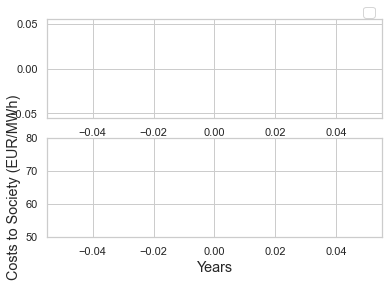

In [177]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(Coststosociety_data)
#ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
plt.ylim([50, 80])
ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
ax2.plot(Coststosociety_data)
#ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.xlabel('Years', fontsize='large')
fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

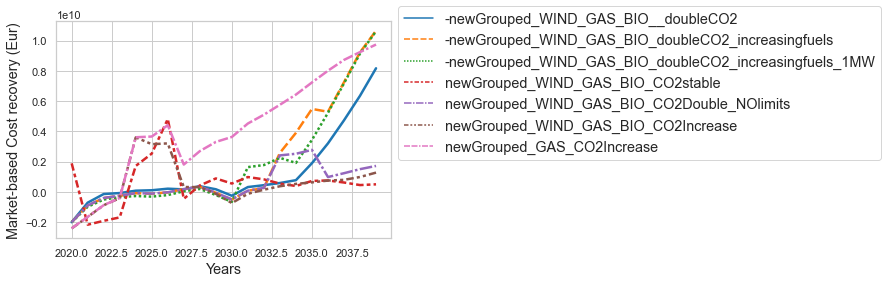

In [178]:
#CostRecovery_data.plot()
axs2 = sns.lineplot(data=CostRecovery_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Cost_Recovery.png', bbox_inches='tight', dpi=300)

Text(0, 0.5, 'Hours')

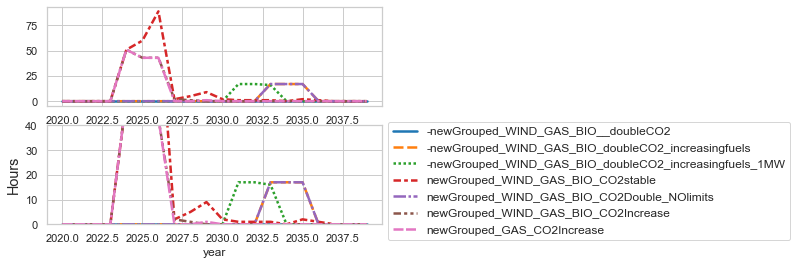

In [219]:
fig, axes = plt.subplots(nrows=2, ncols=1)
sns.set_style("whitegrid")
sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,  ax=axes[0], legend = None)
plt.ylabel('Hours', fontsize='large')
plt.ylim([0, 40])
sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,    ax=axes[1], legend = None)
axes[1].legend(LOL_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
plt.ylabel('Hours', fontsize='large')


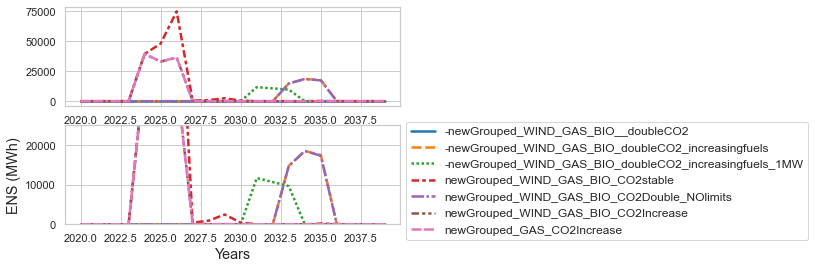

In [226]:
fig, axes= plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[0], legend = None)
plt.ylabel('MWh', fontsize='medium')
plt.ylim([0, 25000])
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[1], legend = None)
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')
axes[1].legend(ENS_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
fig.savefig(path_to_plots + '/' + 'Energy not supplied.png', bbox_inches='tight', dpi=300)

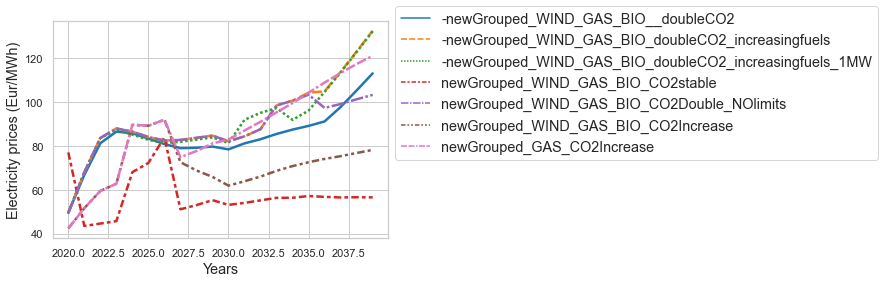

In [181]:
#CostRecovery_data.plot()
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

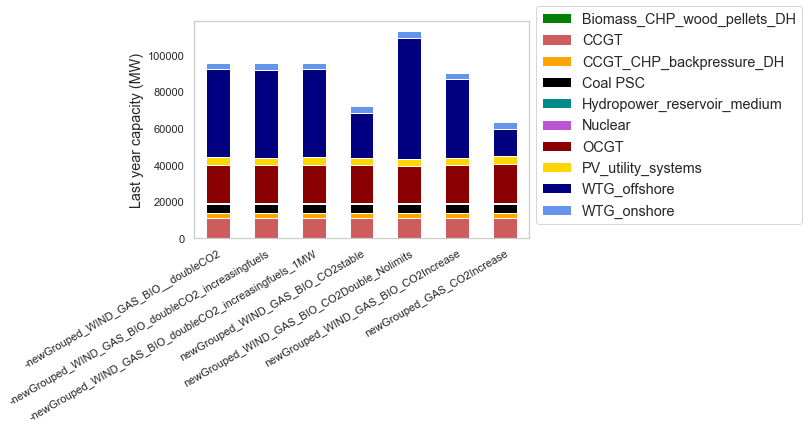

In [224]:
# cpacities = Last_year_capacity_data.T
# cpacities_nozeroes = cpacities[cpacities>0]
# cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)
# colors = [technology_colors[tech] for tech in cpacities_nozeroes.columns.values]
# axs9 = cpacities_nozeroes.plot(kind='bar', stacked=True, color=colors)
# plt.grid()
# sns.set_style("whitegrid")
# #plt.xticks(rotation=30)
# #plt.xticks([])

# axs9.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
# plt.ylabel('Last year capacity (MW)', fontsize='large')
# plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))

# fig9 = axs9.get_figure()
# fig9.savefig(path_to_plots + '/' + 'Last year capacity.png', bbox_inches='tight', dpi=300)


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_13112\3212916587.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")


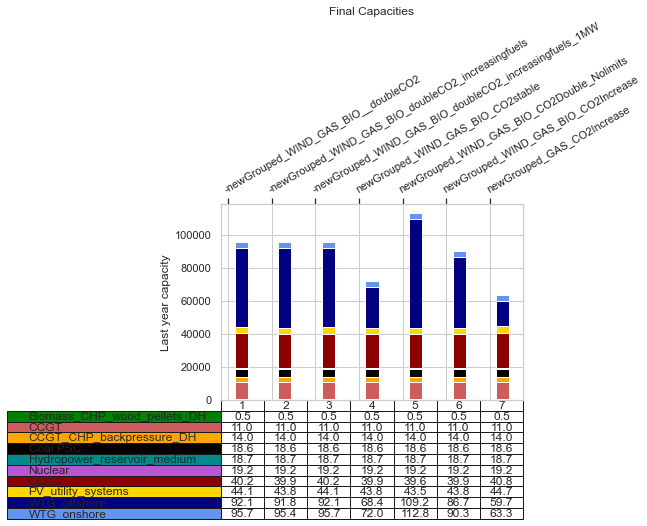

In [183]:
final_year_capacities = cpacities_nozeroes.T
data =final_year_capacities.values
columns = [1,2,3,4,5,6,7]#final_year_capacities.columns
newcolumns = final_year_capacities.columns.insert(0, "new")
rows = final_year_capacities.index

n_rows = len(data)
bar_width = 0.3
index = np.arange(len(columns)) + bar_width

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
fig, axs = plt.subplots()
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc ='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Final Capacities')
plt.ylabel("Last year capacity")

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")
# plt.show()
# plt.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png')
fig10 = plt.gcf()
fig10.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png', bbox_inches='tight', dpi=300)

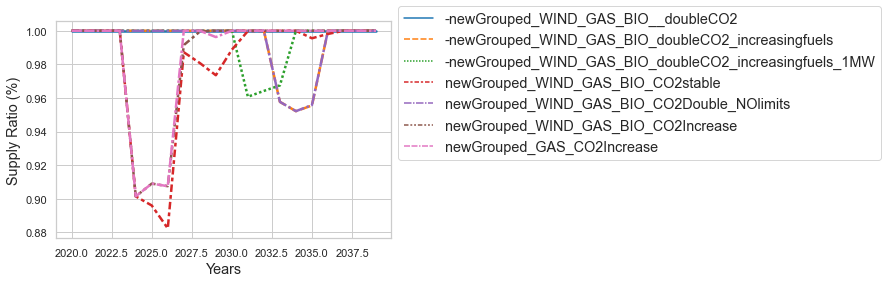

In [184]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


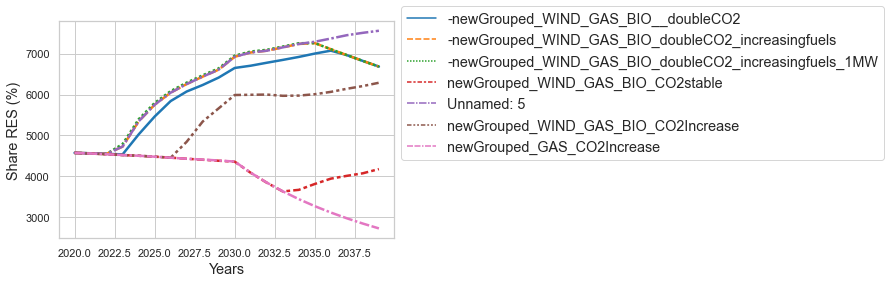

In [185]:
percentage_RES = ShareRES_data*100
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)
